<a href="https://colab.research.google.com/github/sapkale12345/Default-Loan-Prediction/blob/main/Default_loan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
#Preprocessing
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline
from imblearn.combine import SMOTEENN


#Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
#Metrics
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score




In [ ]:
df=pd.read_csv("/content/Loan_default.csv")
df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


Basic Data Understanding


In [ ]:
print(df.shape)
df.info()
df.describe()

(65259, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65259 entries, 0 to 65258
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             65259 non-null  int64  
 1   Income          65259 non-null  int64  
 2   LoanAmount      65259 non-null  int64  
 3   CreditScore     65259 non-null  int64  
 4   MonthsEmployed  65259 non-null  int64  
 5   NumCreditLines  65259 non-null  int64  
 6   InterestRate    65259 non-null  float64
 7   LoanTerm        65259 non-null  int64  
 8   DTIRatio        65259 non-null  float64
 9   Education       65259 non-null  object 
 10  EmploymentType  65259 non-null  object 
 11  MaritalStatus   65259 non-null  object 
 12  HasMortgage     65259 non-null  object 
 13  HasDependents   65259 non-null  object 
 14  LoanPurpose     65259 non-null  object 
 15  HasCoSigner     65259 non-null  object 
 16  Default         65259 non-null  int64  
dtypes: float64(2), int6

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,65259.000000,65259.000000,65259.000000,65259.000000,65259.000000,65259.000000,65259.000000,65259.000000,65259.000000,65259.000000
mean,43.498322,82469.266875,127632.247613,574.433779,59.470648,2.496928,13.514294,36.076311,0.502311,0.116382
std,14.986334,38961.910798,70732.450301,158.482955,34.644342,1.116303,6.637136,16.953544,0.230538,0.320685
min,18.000000,15000.000000,5005.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48792.500000,66392.500000,437.000000,29.000000,2.000000,7.790000,24.000000,0.300000,0.000000
50%,43.000000,82352.000000,127764.000000,574.000000,60.000000,2.000000,13.530000,36.000000,0.500000,0.000000
75%,56.000000,116091.500000,188849.500000,711.000000,89.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149997.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


In [ ]:
print("Default")
df[df.Default==0].drop(columns="Default").describe()


Default


,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio
count,57664.000000,57664.000000,57664.000000,57664.000000,57664.000000,57664.000000,57664.000000,57664.000000,57664.000000
mean,44.430286,83837.577674,125509.966842,576.337472,60.670800,2.483959,13.196649,36.063471,0.500596
std,14.890291,38505.019885,70614.553535,158.356671,34.543408,1.115941,6.610432,16.954618,0.230538
min,18.000000,15000.000000,5005.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000
25%,32.000000,51043.000000,64267.000000,440.000000,31.000000,1.000000,7.460000,24.000000,0.300000
50%,45.000000,84096.500000,124494.000000,576.000000,61.000000,2.000000,13.070000,36.000000,0.500000
75%,57.000000,116955.250000,186204.000000,713.000000,91.000000,3.000000,18.850000,48.000000,0.700000
max,69.000000,149997.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000


In [ ]:
print("Non-Default")
df[df.Default==1].drop(columns="Default").describe()

Non-Default


,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio
count,7595.000000,7595.000000,7595.000000,7595.000000,7595.000000,7595.000000,7595.000000,7595.000000,7595.000000
mean,36.422515,72080.554049,143745.374457,559.980250,50.358657,2.595392,15.925972,36.173799,0.515336
std,13.774593,40802.307787,69544.277404,158.705771,34.050531,1.114208,6.337226,16.946190,0.230136
min,18.000000,15005.000000,5022.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000
25%,25.000000,34181.500000,87227.500000,420.000000,20.000000,2.000000,10.985000,24.000000,0.320000
50%,34.000000,67812.000000,150642.000000,555.000000,46.000000,3.000000,17.000000,36.000000,0.520000
75%,46.000000,106935.000000,204055.000000,695.000000,78.000000,4.000000,21.480000,48.000000,0.720000
max,69.000000,149995.000000,249992.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000


# Data Cleaning

# Remove Unwanted  Features and Observation

In [ ]:
df.drop(columns=["LoanID"],inplace=True)
df.drop_duplicates(inplace=True)
df.shape

(65259, 17)

# Missing Values

In [ ]:
df.isnull().sum()

,0
Age,0
Income,0
LoanAmount,0
CreditScore,0
MonthsEmployed,0
NumCreditLines,0
InterestRate,0
LoanTerm,0
DTIRatio,0
Education,0


# Outlier Detection(IQR Method)

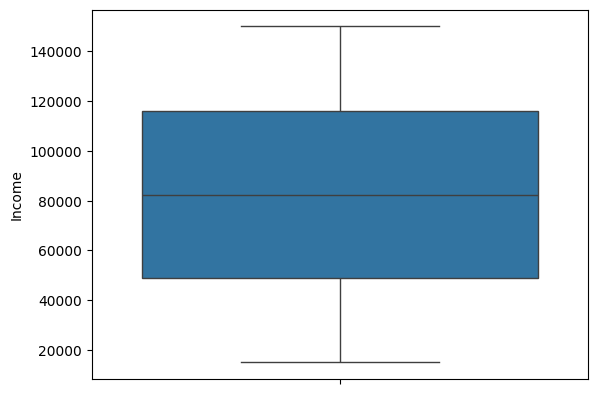

In [ ]:
#Income
sns.boxplot(df.Income)
plt.show()


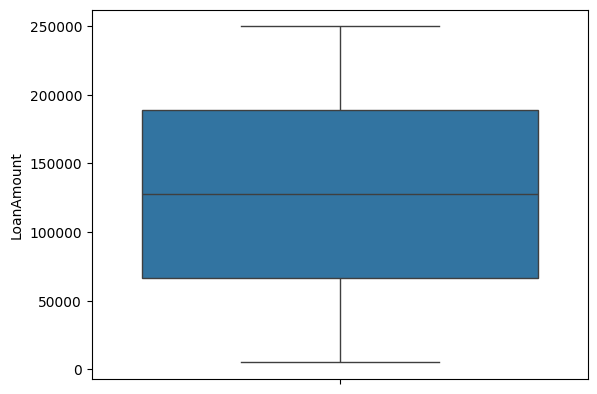

In [ ]:
  #Loane Amount
sns.boxplot(df.LoanAmount)
plt.show()

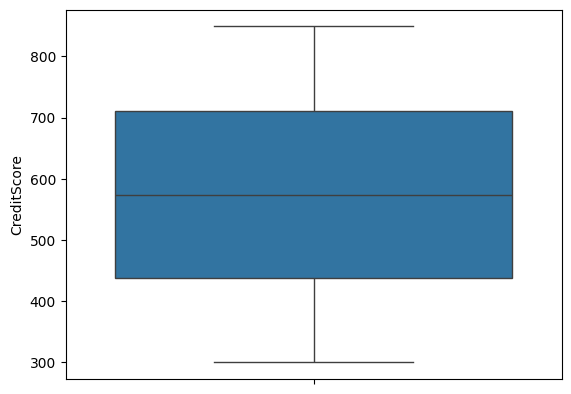

In [ ]:
# CrediScore
sns.boxplot(df.CreditScore)
plt.show()

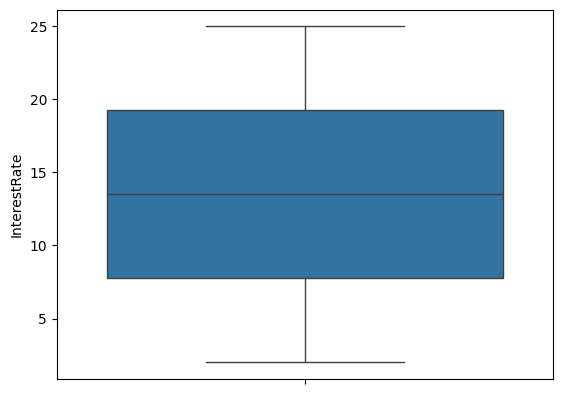

In [ ]:
#InterestRate
sns.boxplot(df.InterestRate)
plt.show()

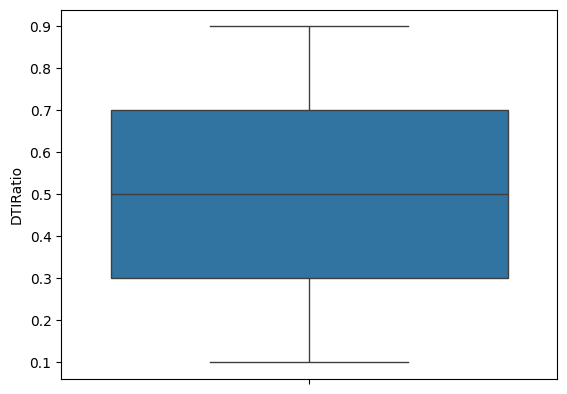

In [ ]:
#DTI Ratio
sns.boxplot(df.DTIRatio)
plt.show()

# **Exploratory Data Analysis**

Default
Non_Default    88.361759
Default        11.638241
Name: count, dtype: float64


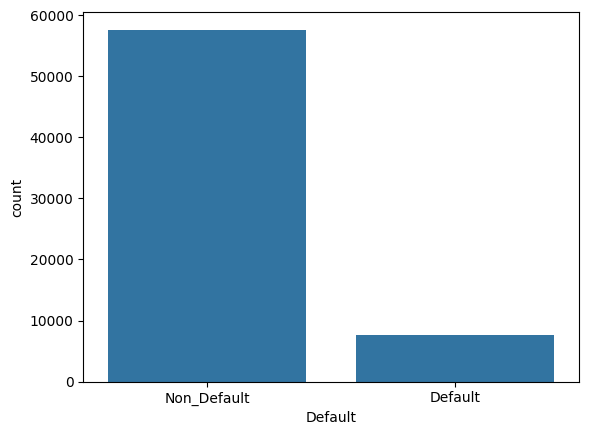

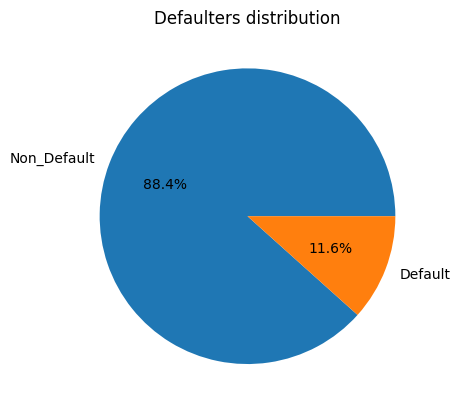

In [ ]:
#Default Distribution
print((df.Default.value_counts()/df.Default.shape*100).rename({0:"Non_Default",1:"Default"}))
sns.countplot(data=df,x="Default")
plt.xticks([0,1],["Non_Default","Default"])
plt.show()
plt.pie(df.Default.value_counts(),labels=["Non_Default","Default"],autopct="%1.1f%%")
plt.title("Defaulters distribution")
plt.show()

# Credit Score-Wise Default Analysis

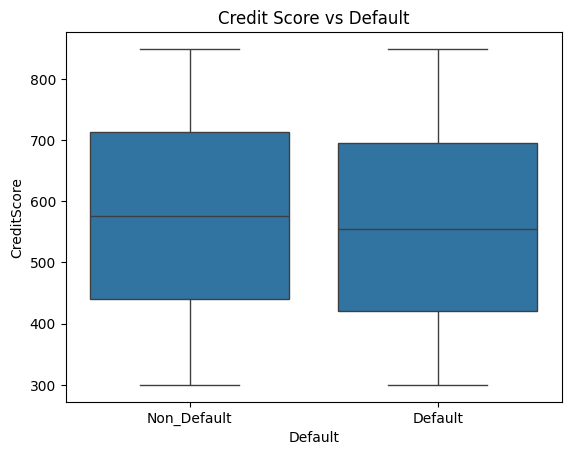

Credit_Score
poor(300-450)         13.122729
Fair(450-600)         11.582665
Good(600-739)         11.222081
very Good(739-799)    10.606920
Excellent(799-850)     9.725017
Name: Default Rate, dtype: float64


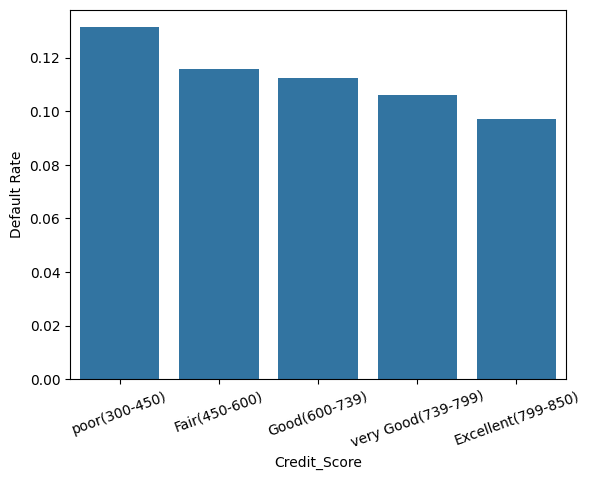

In [ ]:
#Credit Score vs Default
df1=df.loc[:,["CreditScore","Default"]]
sns.boxplot(x='Default', y='CreditScore', data=df)
plt.title("Credit Score vs Default")
plt.xticks([0,1],["Non_Default","Default"])
plt.show()
df1["Credit_Score"]=pd.cut(df1["CreditScore"],bins=[300,450,600,739,799,850],labels=["poor(300-450)","Fair(450-600)","Good(600-739)","very Good(739-799)","Excellent(799-850)"],include_lowest=True)
Default_Rate=(df1.groupby(by="Credit_Score",observed=False).Default.mean()*100).rename("Default Rate")
print(Default_Rate)
sns.barplot(Default_Rate/100)
plt.xticks(rotation=20)
plt.show()






There is strong  inverse relationship between Credit Score and Default Rate

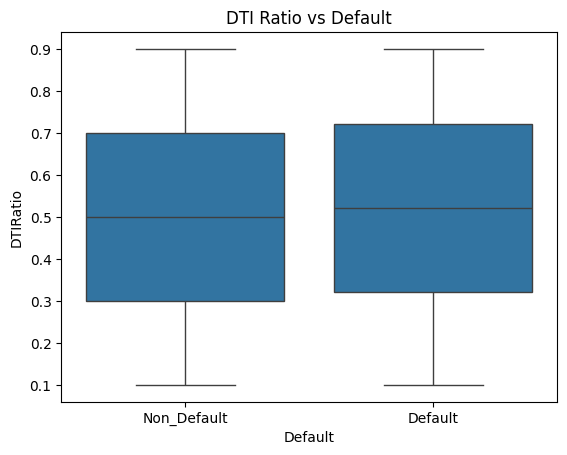

In [ ]:
#DTI Ratio vs Default
sns.boxplot(x='Default', y='DTIRatio', data=df)
plt.title("DTI Ratio vs Default")
plt.xticks([0,1],["Non_Default","Default"])
plt.show()


Age-Wise Default Analysis

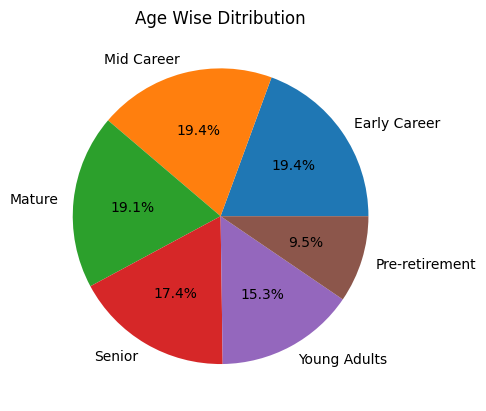

                Default Rate Out of Total Defaulter  Default Rate Within Group
Age_Group                                                                     
Young Adults                               0.271231                   0.206890
Early Career                               0.274128                   0.164442
Mid Career                                 0.190915                   0.114688
Mature                                     0.139961                   0.085361
Pre-retirement                             0.053720                   0.065711
Senior                                     0.070046                   0.046930


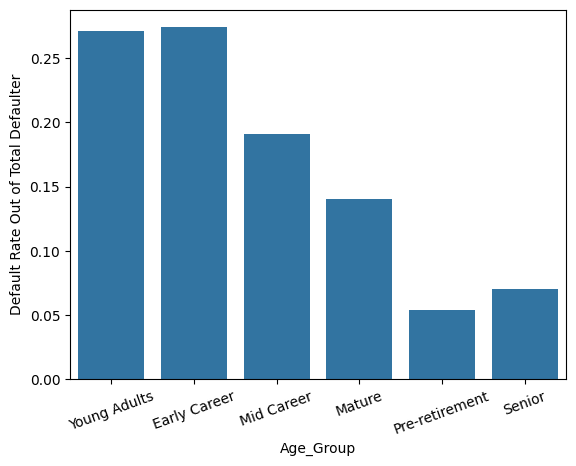

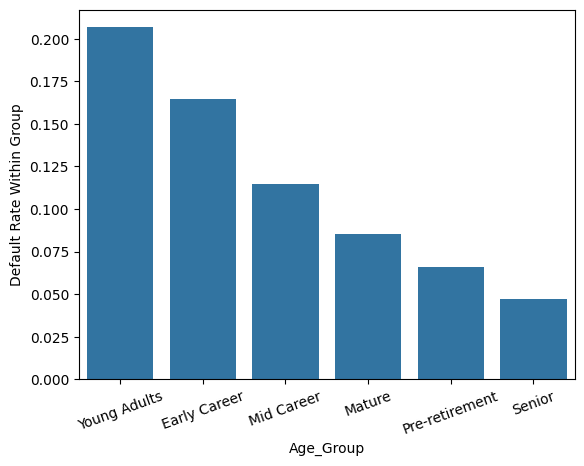

In [ ]:
df3=df.loc[:,["Age","Default"]]
df3["Age_Group"]=pd.cut(df3["Age"],bins=[18,25,35,45,55,60,100],labels=["Young Adults","Early Career","Mid Career","Mature","Pre-retirement","Senior"],include_lowest=True)
plt.pie(df3.Age_Group.value_counts(),labels=df3.Age_Group.value_counts().index,autopct="%1.1f%%")
plt.title("Age Wise Ditribution")
plt.show()
Default_Rate1 =((df3.groupby(by="Age_Group",observed=False).Default.sum()/(df3[df3.Default==1].shape[0]))).rename("Default Rate Out of Total Defaulter")
Default_Rate2 =(df3.groupby(by="Age_Group",observed=False).Default.mean()).rename("Default Rate Within Group")
print(pd.DataFrame([Default_Rate1,Default_Rate2]).T)
sns.barplot(Default_Rate1)
plt.xticks(rotation=20)
plt.show()
sns.barplot(Default_Rate2)
plt.xticks(rotation=20)
plt.show()






# Finding Correlation

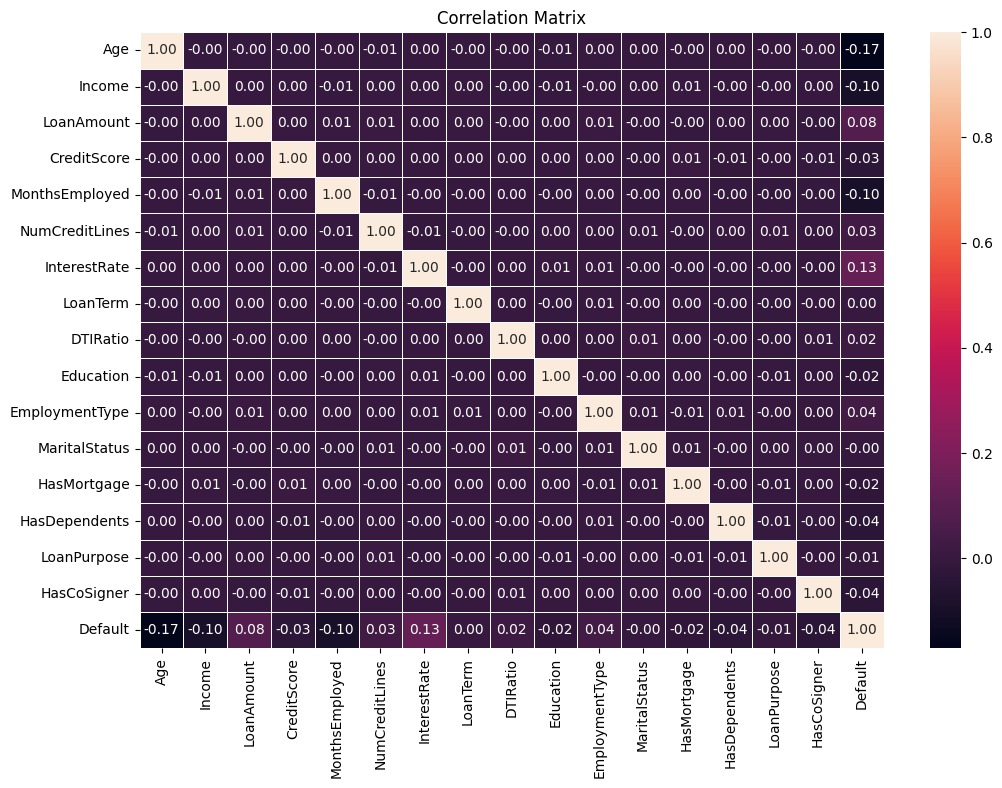

In [ ]:
from sklearn.preprocessing import LabelEncoder
data=df.copy()
num_features = [
    'Age','Income','LoanAmount','InterestRate','LoanTerm',
    'DTIRatio','CreditScore','MonthsEmployed','NumCreditLines'
]

cat_features = ['Education','MaritalStatus','EmploymentType','LoanPurpose','HasDependents','HasMortgage','HasCoSigner']
encoder=LabelEncoder()
for  col in cat_features:
    data[col]=encoder.fit_transform(data[col])
Correlation_Matrix=data.corr()
plt.figure(figsize=(12,8))
sns.heatmap(Correlation_Matrix,annot=True,fmt=".2f",linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()




# FEATURE & TARGET SPLIT

In [ ]:

X = df.drop(columns='Default')
y = df['Default']


# Train-Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

# DATA PREPROCESSING PIPELINE

In [ ]:
#Column Transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore',drop="first"), cat_features)
    ]
)

# Model Development

Logistic Regression With SMOTTEEN

In [ ]:
lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('smoteenn', SMOTEENN(random_state=42)),
    ('model', LogisticRegression(
        class_weight='balanced',
        max_iter=1000
    ))
])
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
y_prob = lr.predict_proba(X_test)[:,1]
threshold = 0.45
y_pred_thresh = (y_prob >= threshold).astype(int)
print(confusion_matrix(y_test,y_pred_thresh))
print(classification_report(y_test, y_pred_thresh))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))




[[6545 4988]
 [ 346 1173]]
              precision    recall  f1-score   support

           0       0.95      0.57      0.71     11533
           1       0.19      0.77      0.31      1519

    accuracy                           0.59     13052
   macro avg       0.57      0.67      0.51     13052
weighted avg       0.86      0.59      0.66     13052

ROC-AUC: 0.7456199621123276


Random Forest with SMOTTEEN¶

In [ ]:
rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('smoteenn', SMOTEENN(random_state=42)),
    ('model', RandomForestClassifier(
        n_estimators=300,
        random_state=42,
        max_depth=5
        class_weight="balanced"
    ))
])
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:,1]
threshold = 0.49
y_pred_thresh = (y_prob >= threshold).astype(int)
print(confusion_matrix(y_test,y_pred_thresh))
print(classification_report(y_test, y_pred_thresh))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

[[9000 2533]
 [ 689  830]]
              precision    recall  f1-score   support

           0       0.93      0.78      0.85     11533
           1       0.25      0.55      0.34      1519

    accuracy                           0.75     13052
   macro avg       0.59      0.66      0.59     13052
weighted avg       0.85      0.75      0.79     13052

ROC-AUC: 0.7380910045062322


Gradient Boosting With SMOTTEEN

In [ ]:

gb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('smoteenn', SMOTEENN(random_state=42)),
    ('model', GradientBoostingClassifier(
        n_estimators=200,
        learning_rate=0.05,
        random_state=42
    ))
])
gb.fit(X_train, y_train)

y_pred = gb.predict(X_test)
y_prob = gb.predict_proba(X_test)[:,1]
threshold = 0.49
y_pred_thresh = (y_prob >= threshold).astype(int)
print(confusion_matrix(y_test,y_pred_thresh))
print(classification_report(y_test, y_pred_thresh))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))



[[8362 3171]
 [ 575  944]]
              precision    recall  f1-score   support

           0       0.94      0.73      0.82     11533
           1       0.23      0.62      0.34      1519

    accuracy                           0.71     13052
   macro avg       0.58      0.67      0.58     13052
weighted avg       0.85      0.71      0.76     13052

ROC-AUC: 0.7418527719095794


Balanced Random Forest With SMOTTEEN

In [ ]:
brf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', BalancedRandomForestClassifier(
        n_estimators=300,
        random_state=42,
        max_depth=4
    ))
])
brf.fit(X_train, y_train)

y_pred = brf.predict(X_test)
y_prob = brf.predict_proba(X_test)[:,1]
threshold = 0.48
y_pred_thresh = (y_prob >= threshold).astype(int)
print(confusion_matrix(y_test,y_pred_thresh))
print(classification_report(y_test, y_pred_thresh))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))



[[7061 4472]
 [ 396 1123]]
              precision    recall  f1-score   support

           0       0.95      0.61      0.74     11533
           1       0.20      0.74      0.32      1519

    accuracy                           0.63     13052
   macro avg       0.57      0.68      0.53     13052
weighted avg       0.86      0.63      0.69     13052

ROC-AUC: 0.7441349142258694


In loan default prediction, missing a defaulter leads to financial loss.
Hence, recall for default cases was prioritized over accuracy.
Threshold tuning was applied to improve recall while maintaining stable ROC-AUC.
Balanced Random Forest was selected due to its robustness on imbalanced data


## FINAL MODEL (Balanced Random Forest)

In [ ]:
brf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', BalancedRandomForestClassifier(
        n_estimators=300,
        random_state=42,
        max_depth=4
    ))
])
brf.fit(X_train, y_train)

y_pred = brf.predict(X_test)
y_prob = brf.predict_proba(X_test)[:,1]
threshold = 0.48
y_pred_thresh = (y_prob >= threshold).astype(int)
print(confusion_matrix(y_test,y_pred_thresh))
print(classification_report(y_test, y_pred_thresh))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))



[[7061 4472]
 [ 396 1123]]
              precision    recall  f1-score   support

           0       0.95      0.61      0.74     11533
           1       0.20      0.74      0.32      1519

    accuracy                           0.63     13052
   macro avg       0.57      0.68      0.53     13052
weighted avg       0.86      0.63      0.69     13052

ROC-AUC: 0.7441349142258694


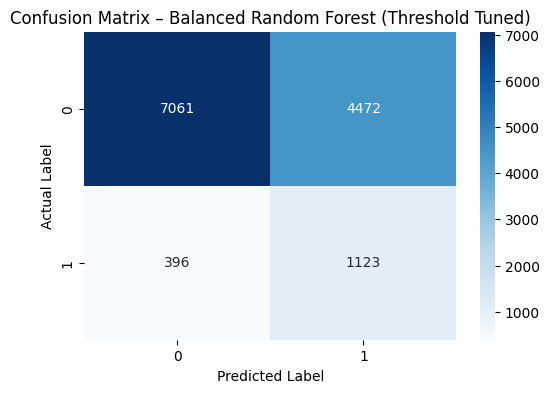

In [ ]:
cm = confusion_matrix(y_test, y_pred_thresh)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix – Balanced Random Forest (Threshold Tuned)")
plt.show()
